# Recommendation System for Brazilian E-commerce Marketplace.
**Authors:** Elena Burlando

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

# import libraries

import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import sklearn as sk

## Overview

This is a classification recommendation system project. 

![alt text](Visuals/header.jpg)
[image source](https://www.pymnts.com/news/investment-tracker/2021/olist-raises-23-million-in-round-led-by-goldman-sachs/)

## Business Problem

   Olist is a Brazilian marketplace that helps small businesses to establish plug and play online shops, manage its inventory, and handle logistics. With the current new round of funding of 186M USD (including 23M USD investment from Goldman Sachs) at the end of 2021, Olist is planning to develop an e-commerce platform for its clients to sell their products. \
   \
    Even though Olist has been successfully signing up new businesses with its current products, most stores struggled to acquire new customers and create traffic channels that would lead to increased sales on their own websites. A new common e-commerce platform (like Amazon marketplace) will serve as an additional sales channel to Olist clients. A business owner can link their existing online store to the platform and sell directly on it without reinputting product information. Olist is planning to hire a full-time marketing and business analytics teams dedicated to promoting its platform and to create a sophisticated recommendation system that will help small businesses to be discovered and scaled. \
    \
    As a business owner myself who used Shopify, Etsy, and Amazon to establish online presence, I have experienced how hard it is to compete with more established brands, to be discovered among other hundreds small shops, and ramp up sales. According to U.S. Bureau of Labor and Statistics, close to 1 in 5 businesses fail within the first year and over 65.5% of businesses will close after 10 years. In Brazil small business account for 98.5% of enterprise, contributing 54.5% of employment and 30% of country’s GDP. Sustaining small business is crucial for economic health. \
    \
   The target audience is the stakeholders and investors of Olist.


### Data Understanding

* [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download&select=olist_order_reviews_dataset.csv)

The dataset has extensive information of real data of 100K orders made from 2016-2018 at Olist marketplace. Orders represented with order status, price, payment information, freight performance along with customer and seller details such as location, reviews, product attributes, and customer order ratings. Rating scale is 1 to 5. 

A note on dataset (from Kaggle): 
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

**Data Schema:**
![Data Schema](Visuals/data_schema.png)


**Target & Metrics**
***
* The target variable is rating.  
* The main metric is Cumulative Hit Rate. Other metrics that wil be used are listed below.  
* We intend to use Neural Network to test and develop a new Recommendation system.  
* For hyper parameter tuning we will use GridSearchCV and RandomizedSearchCV. 
* We will be following CRISP-DM process for this project. 
***


**Metrics Description**:\
\
**RMSE:**      Root Mean Squared Error. Lower values mean better accuracy.\
**MAE:**       Mean Absolute Error. Lower values mean better accuracy.\
**HR:**        Hit Rate; how often we are able to recommend a left-out rating. Higher is better.\
**rHR:**       Rated Hit Rate; hit rate broken down for rating scale.     
**cHR:**       Cumulative Hit Rate; hit rate, confined to ratings above a certain threshold. Higher is better.\
**ARHR:**      Average Reciprocal Hit Rank - Hit rate that takes the ranking into account. Higher is better.\
**Coverage:**  Ratio of users for whom recommendations above a certain threshold exist. Higher is better.\
**Diversity:** 1-S, where S is the average similarity score between every possible pair of recommendations for a given            user. Higher means more diverse.\
**Novelty:**   Average popularity rank of recommended items. Higher means more novel.

Above metrics and coding associated with it came from Frank Kane's ['Building Recommender Systems with Machine Learning and AI' course](https://www.linkedin.com/learning/building-recommender-systems-with-machine-learning-and-ai/)

***

## EDA

We are going to start by looking through and cleaning up datasets from Olist marketplace.

In [2]:
# creating a function to loop through each dataframe to get it's shape, info, and head. 

def eda(dataset_list): 
    for dataset in dataset_list: 
        df = pd.read_csv(dataset)
        print('Dataset:', dataset)
        print(df.shape)
        print('\n')
        print(df.info())
        print('\nMissing values:')
        print(df.isnull().sum())
        print('\nNumber of duplicates:')
        print(df.duplicated().sum())
        print('\nBasic Statistics:')
        print(df.describe())
        print('\nDataset table:')
        print(df.head())
        print('\n')
        print('\n')

In [3]:
# Looping through each dataset to get it's details

# Creating a list of dataset links
dataset_links = ['data/olist_customers_dataset.csv', 
                'data/olist_geolocation_dataset.csv', 
                'data/olist_order_items_dataset.csv',
                'data/olist_order_payments_dataset.csv', 
                'data/olist_order_reviews_dataset.csv', 
                'data/olist_orders_dataset.csv',
                'data/olist_products_dataset.csv',
                'data/olist_sellers_dataset.csv', 
                'data/product_category_name_translation.csv']

eda(dataset_links)

Dataset: data/olist_customers_dataset.csv
(99441, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Number of duplicates:
0

Basic Statistics:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                1

Dataset: data/olist_order_reviews_dataset.csv
(99224, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Missing values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Number of duplicates:
0

Basic Statisti

**Overview of each dataset**

olist_customers_dataset: 
* columns 'customer_id' and 'customer_unique_id' contains both numbers and letters. 
* no missing entries

olist_geolocation_dataset: 
* no missing entries
* Number of duplicates: 261,831

olist_order_items_dataset:
* 'order_item_id' is probably number of products in the order (needs to be investigated further). 
* 'shipping_limit_date' is an object data. 

olist_order_payments_dataset: 
* no missing data. 
* 'payment_value' is unclear if it is a full payment value or installment. 

olist_order_reviews_dataset: 
* review_id and order_id contain both numbers and letters
* no missing review scores
* out of 99,224 review scores there are only 11,568 review comment titles
* out of 99,224 review scores there are 40,977 review comment messages\

olist_orders_dataset: 
* all timestamp data is in object format, not datetime. 
* column 'order_approved_at' is missing 160 entries.
* column 'order_delivered_carrier_date' is missing 1,783 entries.
* column 'order_delivered_customer_date' is missing 2,965 entries.

olist_products_dataset: 
* 'product_category_name' is in Portuguese. 
* columns: 'product_category_name', 'product_name_lenght', 'product_description_lenght', and 'product_photos_qty' are missing 610 entries. 
* columns: 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' are missing two entries. 

olist_sellers_dataset: 
* no information is missing. 

product_category_name_translation: 
* no information is missing

### customers_dataset

In [4]:
# Let's take a closer look at olist_customers_dataset

customers_df = pd.read_csv('data/olist_customers_dataset.csv')
print('Number of customer IDs:', customers_df.customer_id.nunique())
print('Number of customer unique IDs:', customers_df.customer_unique_id.nunique())
print('Number of zipcodes:', customers_df.customer_zip_code_prefix.nunique())
print('Number of cities:', customers_df.customer_city.nunique())
print('Number of states:', customers_df.customer_state.nunique())

Number of customer IDs: 99441
Number of customer unique IDs: 96096
Number of zipcodes: 14994
Number of cities: 4119
Number of states: 27


According to Kaggle, customer_id is a key to the orders dataset. Each order has a unique customer_id. 
Customer_unique_id is a unique identifier of a customer. 

This means that total customer pool is 96,096 customers with some customers submitting multiple orders. 

In [5]:
# adding 'number_of_orders' column to calculate number of orders per client
customers_df['number_of_orders'] = customers_df.groupby('customer_unique_id')['customer_unique_id'].\
transform('count')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,number_of_orders
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1


In [6]:
# number of orders per client distribution in percentages
customers_df['number_of_orders'].value_counts(normalize = True)

1     0.936223
2     0.055209
3     0.006124
4     0.001207
5     0.000402
6     0.000362
7     0.000211
17    0.000171
9     0.000091
Name: number_of_orders, dtype: float64

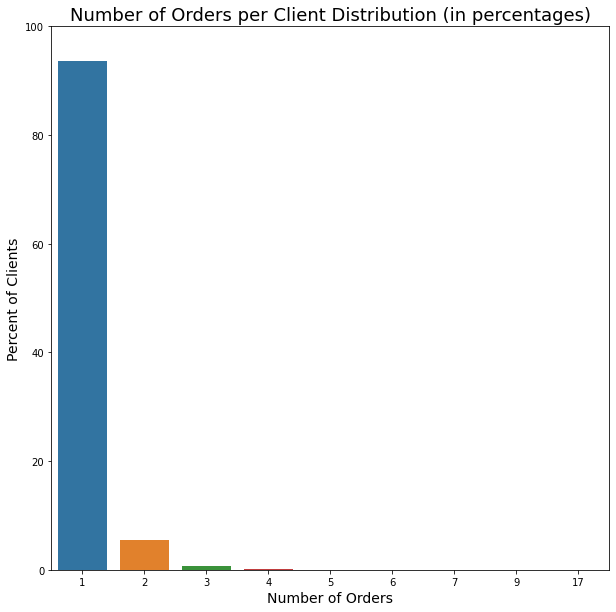

In [7]:
# Creating a bar plot for number of orders distribution

# import seaborn library
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

bar = sns.barplot(x = "number_of_orders", y = "number_of_orders", 
                 data = customers_df, estimator = lambda x: len(x) / len(customers_df) * 100)
ax.set_xlabel("Number of Orders", fontsize = 14)
ax.set_ylabel("Percent of Clients", fontsize = 14)
ax.set_title("Number of Orders per Client Distribution (in percentages)", fontsize = 18)
ax.set_ylim(top=100)

plt.savefig('Visuals/Distribution_of_Number_of_Orders_in_Percentages.png', bbox_inches='tight', dpi=600);

***
Over 93% of clients have submitted only one order in the span of two years. 
***

In [8]:
# adding 'orders_state' column to calculate number of orders per state
customers_df['orders_state'] = customers_df.groupby('customer_state')['customer_state'].\
transform('count')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,number_of_orders,orders_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,41746
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,41746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,41746
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,41746
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,41746
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,41746
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,41746
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1336
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,5466


In [9]:
# Sorting customer_df to prep for plot
customer_state_df = customers_df.sort_values('orders_state', ascending = False)

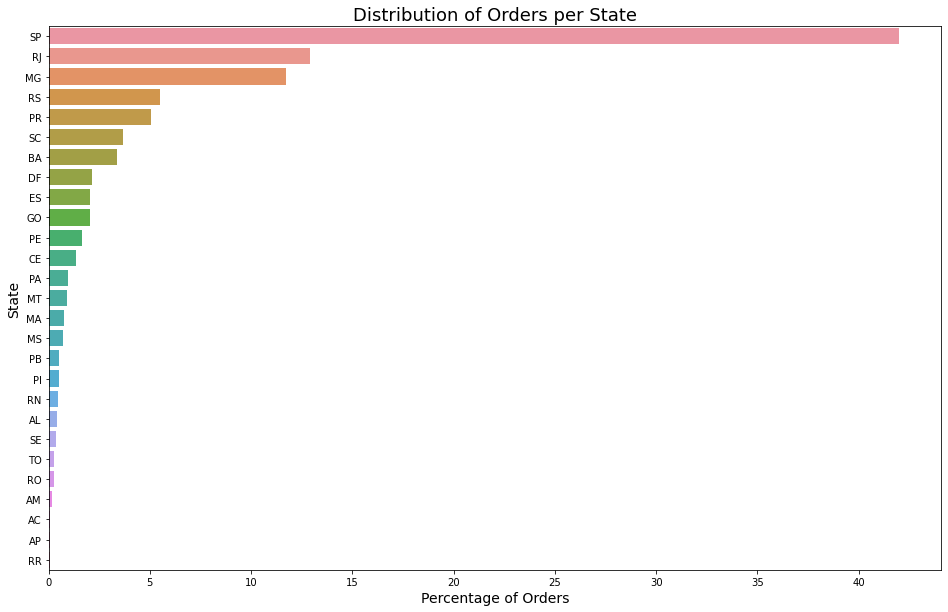

In [10]:
# Let's look at the order distribution per state

fig, ax = plt.subplots(figsize=(16, 10))

bar = sns.barplot(x = 'orders_state', y = 'customer_state', 
                 data = customer_state_df, estimator = lambda x: len(x) / len(customers_df) * 100)
ax.set_xlabel('Percentage of Orders', fontsize = 14)
ax.set_ylabel('State', fontsize = 14)

ax.set_title("Distribution of Orders per State", fontsize = 18)

plt.savefig('Visuals/Distribution_of_Orders_per_State_in_Percentages.png', bbox_inches='tight', dpi=600);

***
Top three states with most orders are Sao Paolo (over 43%), Rio de Janeiro, and Minas Gerais.
***

In [11]:
# sorting through the 'customer_city' to see the top cities with most orders. 
city_orders = customers_df.customer_city.value_counts(normalize = True).iloc[:10].sort_values(ascending = True)
city_orders

sao bernardo do campo    0.009433
guarulhos                0.011957
salvador                 0.012520
porto alegre             0.013868
campinas                 0.014521
curitiba                 0.015296
brasilia                 0.021430
belo horizonte           0.027886
rio de janeiro           0.069207
sao paulo                0.156274
Name: customer_city, dtype: float64

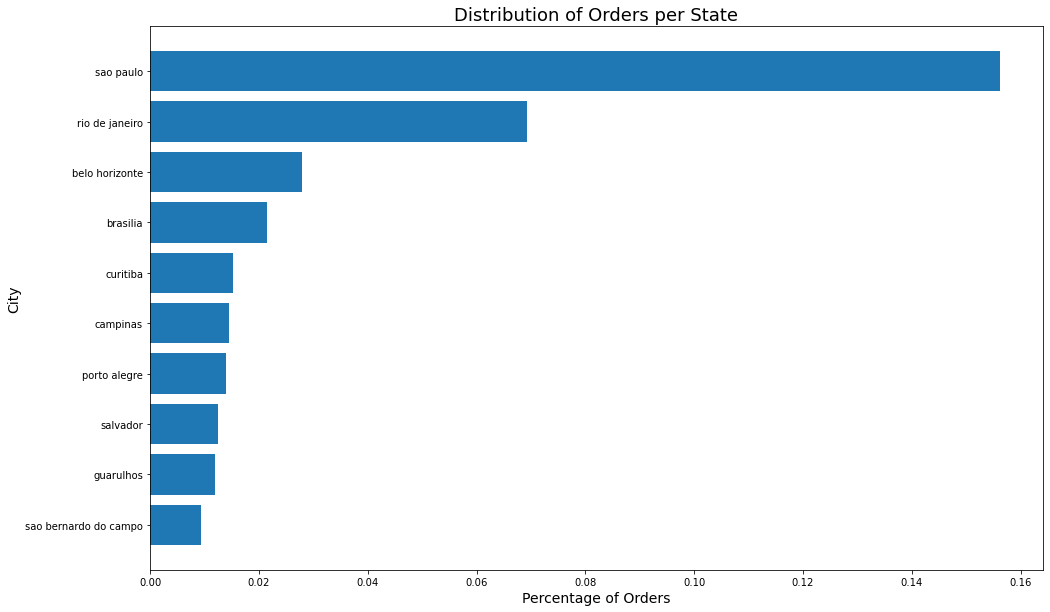

In [12]:
# Let's look at the order distribution per city

fig, ax = plt.subplots(figsize=(16, 10))

ax.barh(city_orders.index, city_orders.values)
ax.set_xlabel('Percentage of Orders', fontsize = 14)
ax.set_ylabel('City', fontsize = 14)

ax.set_title("Distribution of Orders per State", fontsize = 18)

plt.savefig('Visuals/Distribution_of_Orders_per_City_in_Percentages.png', bbox_inches='tight', dpi=600);

***
The top city with over 15% of orders is Sao Paolo followed by Rio de Janeiro and Belo Horizonte. 
***

### geolocation_dataset

In [13]:
# Opening geolocation_dataset

geolocation_df = pd.read_csv('data/olist_geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### order_items_dataset

Notes from above on this dataset: \
olist_order_items_dataset:
* 'order_item_id' is probably number of products in the order (needs to be investigated further). 
* 'shipping_limit_date' is an object data. 


In [14]:
# reviewing the df 
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


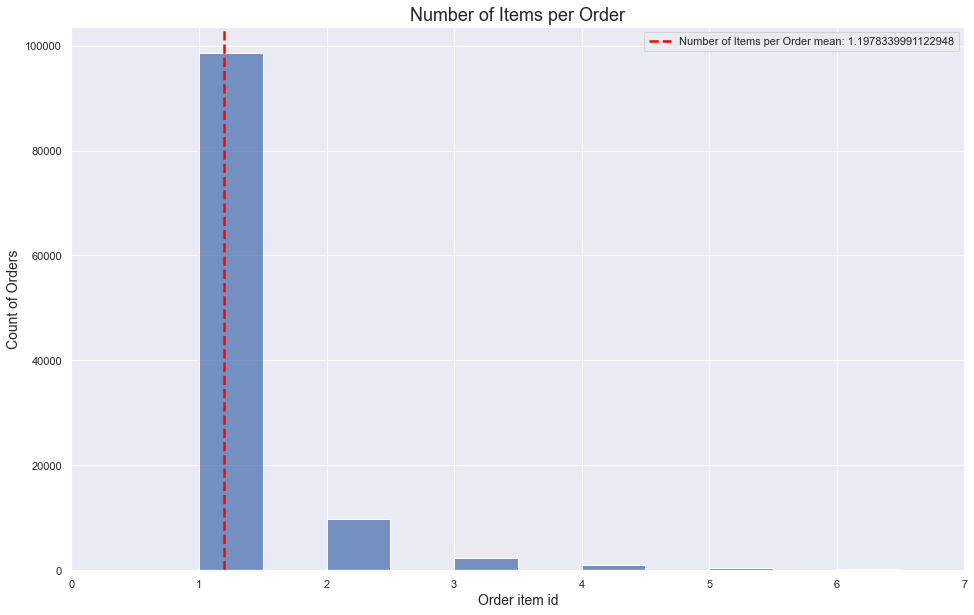

In [73]:
# investigating 'order_item_id' column

# looking at the 'order_item_id' distribution

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'order_item_id',
             data = order_items_df,
             binwidth = 0.5)
ax.set_xlabel('Order item id', fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Number of Items per Order', fontsize = 18)
ax.set_xlim(left = 0, right = 7)
plt.axvline(x = order_items_df.order_item_id.mean(),
            color = 'red', 
            ls = '--', 
            lw = 2.5)
ax.legend([f'Number of Items per Order mean: {order_items_df.order_item_id.mean()}'])
plt.savefig('Visuals/order_item_id_dist.png', bbox_inches='tight', dpi=600);

Most orders have one item per order. 

In [15]:
# converting 'shipping_limit_date' from obj to datetime type. 
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [16]:
# confirm the convertion to datetime
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


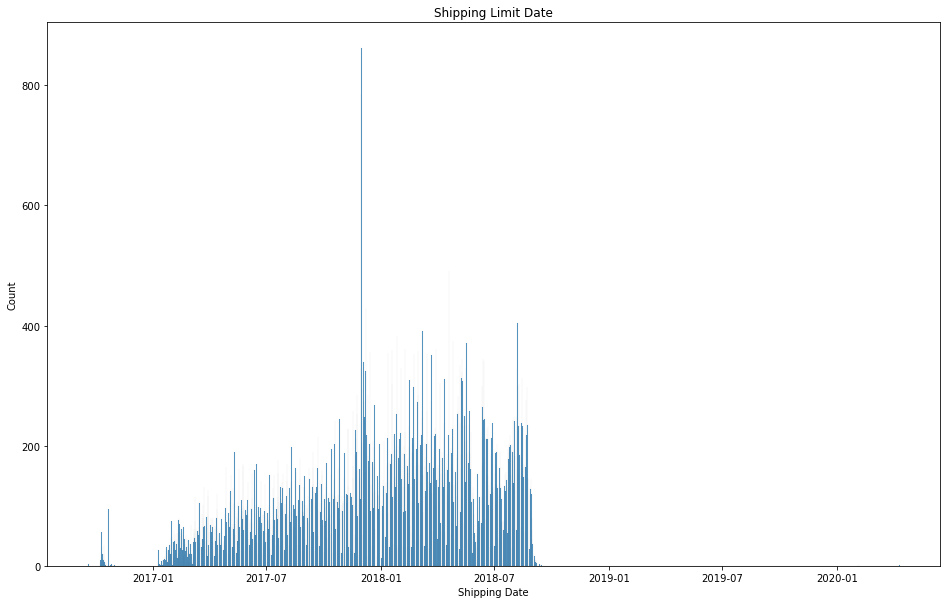

In [17]:
# looking at the review scale distribution

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'shipping_limit_date',
             data = order_items_df,
             binwidth = 0.5)
ax.set(title = 'Shipping Limit Date')
ax.set(xlabel = 'Shipping Date')
plt.savefig('Visuals/Shipping_limit_date.png', bbox_inches='tight', dpi=600);

It appears that the count of shipping limit dates have progressively been increasing with picks before 2018 New Year. 

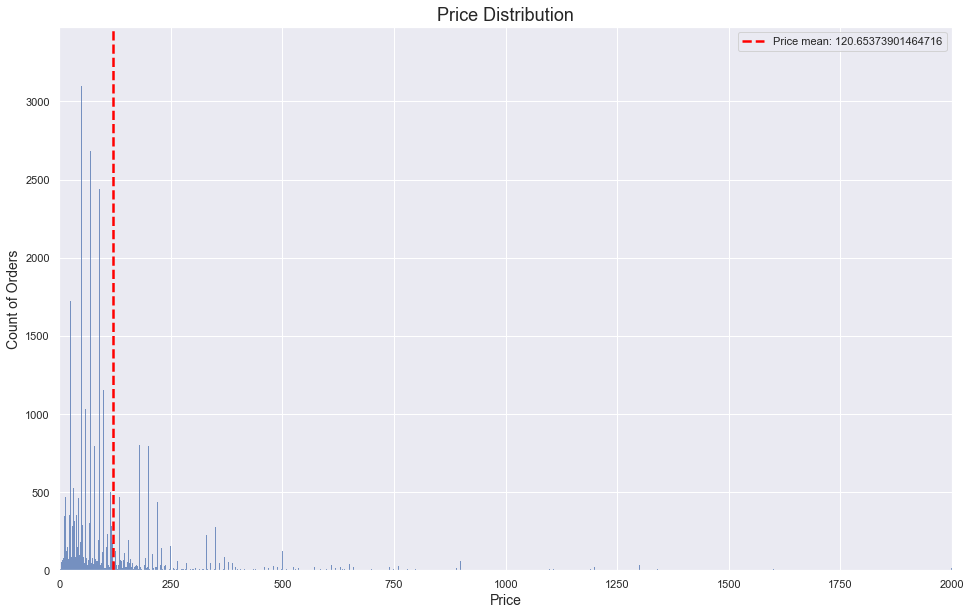

In [66]:
# looking at the price distribution

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'price',
             data = order_items_df,
             binwidth = 0.5)
ax.set_xlabel("Price", fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Price Distribution', fontsize = 18)
ax.set_xlim(left = 0, right = 2000)
plt.axvline(x = order_items_df.price.mean(),
            color = 'red', 
            ls = '--', 
            lw = 2.5)
ax.legend([f'Price mean: {order_items_df.price.mean()}'])
plt.savefig('Visuals/price_dist.png', bbox_inches='tight', dpi=600);

In [69]:
# looking at statistics of pricing. 
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Average price is 120.65 Brazilian Reals with the majority of orders between 40 to 135 Reals. 

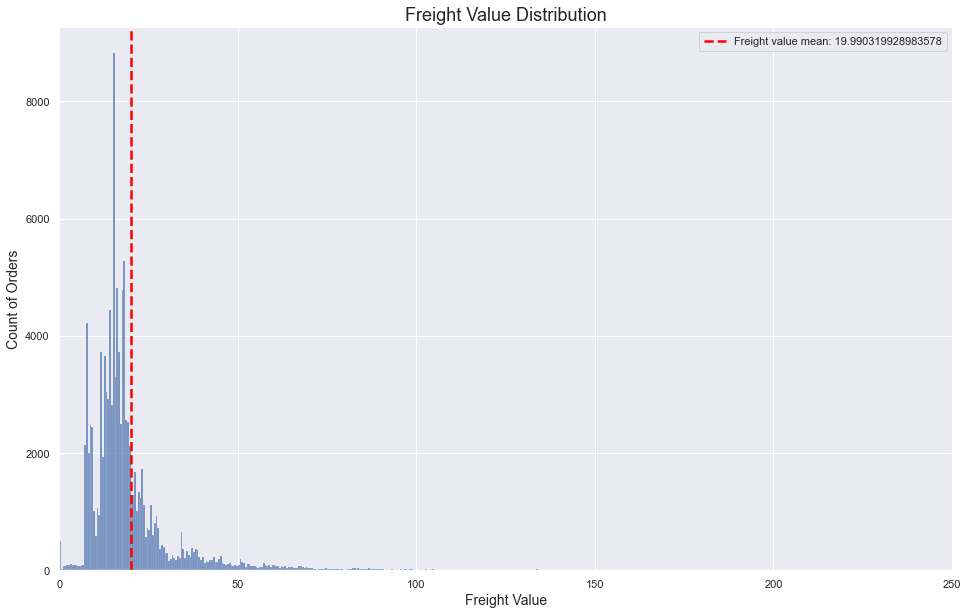

In [68]:
# looking at the 'freight_value' distribution

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'freight_value',
             data = order_items_df,
             binwidth = 0.5)
ax.set_xlabel('Freight Value', fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Freight Value Distribution', fontsize = 18)
ax.set_xlim(left = 0, right = 250)
plt.axvline(x = order_items_df.freight_value.mean(),
            color = 'red', 
            ls = '--', 
            lw = 2.5)
ax.legend([f'Freight value mean: {order_items_df.freight_value.mean()}'])
plt.savefig('Visuals/freight_value_dist.png', bbox_inches='tight', dpi=600);

Mean freight value is 20 reals with std at 16 reals.

### order_payments_dataset

Previous notes: 
    
olist_order_payments_dataset:

- no missing data.
- 'payment_value' is unclear if it is a full payment value or installment.

In [75]:
# Let's take a closer look at olist_order_payments_dataset

payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [76]:
print('Number of order IDs:', payments_df.order_id.nunique())
print('Number of payment types:', payments_df.payment_type.nunique())

Number of order IDs: 99440
Number of payment types: 5


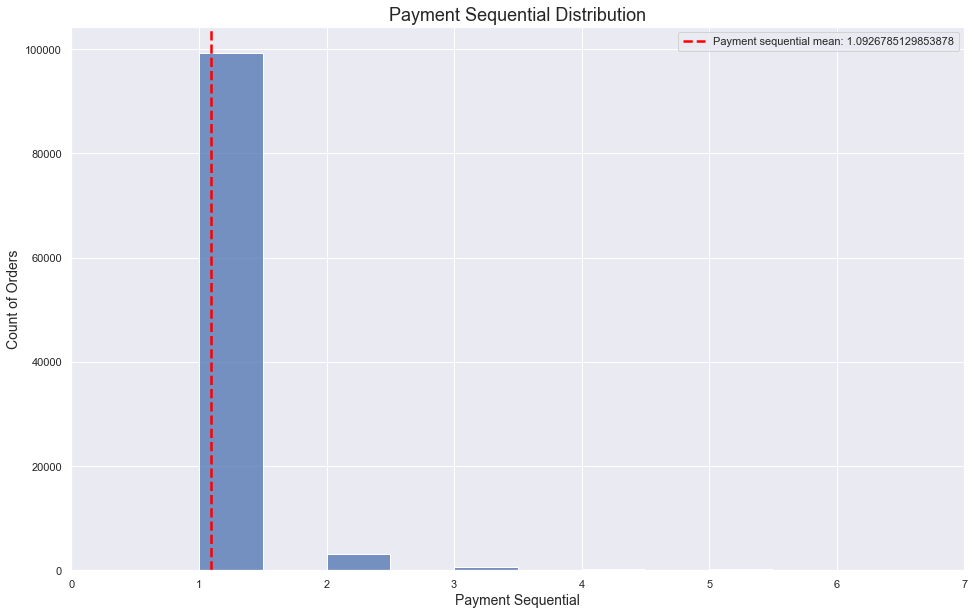

In [81]:
# 'payment_sequential' distribution
fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'payment_sequential',
             data = payments_df,
             binwidth = 0.5)
ax.set_xlabel('Payment Sequential', fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Payment Sequential Distribution', fontsize = 18)
ax.set_xlim(left = 0, right = 7)
plt.axvline(x = payments_df.payment_sequential.mean(),
            color = 'red', 
            ls = '--', 
            lw = 2.5)
ax.legend([f'Payment sequential mean: {payments_df.payment_sequential.mean()}'])
plt.savefig('Visuals/payment_sequential_dist.png', bbox_inches='tight', dpi=600);

Most clients paid with one payment method. 

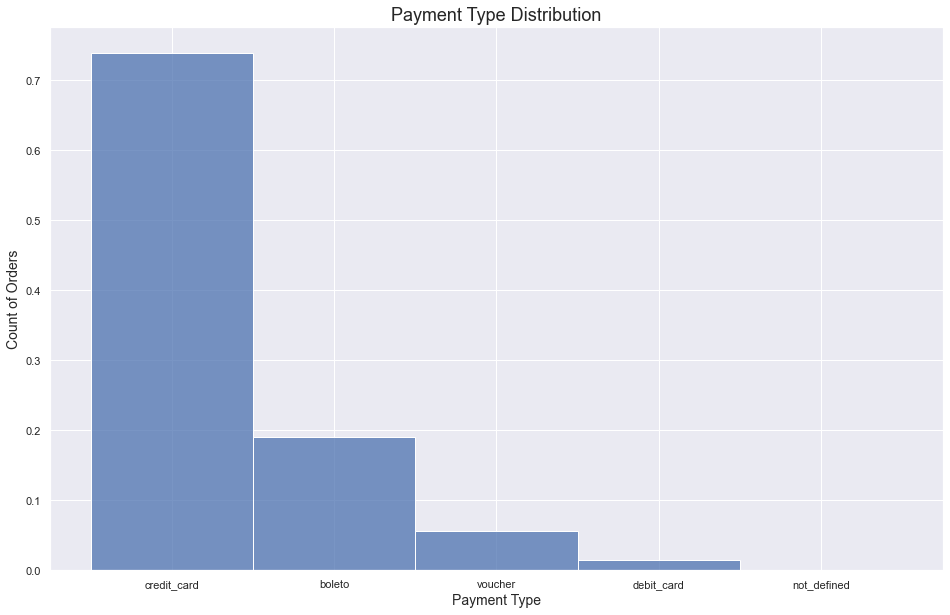

In [83]:
# 'payment_type' distribution
fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'payment_type',
             data = payments_df,
             stat = 'probability',
             binwidth = 0.5)
ax.set_xlabel('Payment Type', fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Payment Type Distribution', fontsize = 18)

plt.savefig('Visuals/payment_type_dist.png', bbox_inches='tight', dpi=600);

Over 70% of customers paid with credit card. Close to 20% of clients use Boleto (cash app) to purchase goods. 

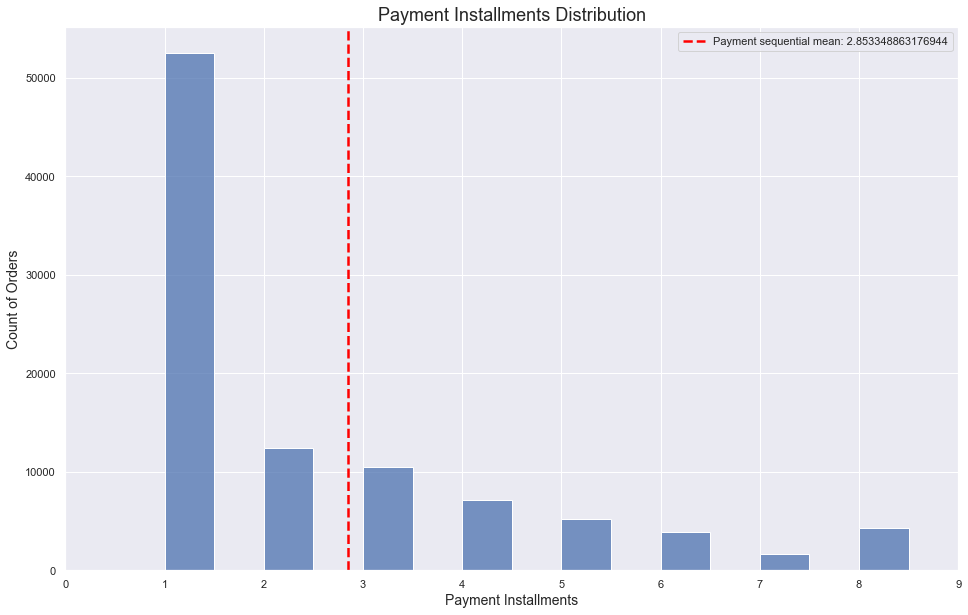

In [85]:
# 'payment_installments' distribution
fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'payment_installments',
             data = payments_df,
             binwidth = 0.5)
ax.set_xlabel('Payment Installments', fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Payment Installments Distribution', fontsize = 18)
ax.set_xlim(left = 0, right = 9)
plt.axvline(x = payments_df.payment_installments.mean(),
            color = 'red', 
            ls = '--', 
            lw = 2.5)
ax.legend([f'Payment sequential mean: {payments_df.payment_installments.mean()}'])
plt.savefig('Visuals/payment_installments_dist.png', bbox_inches='tight', dpi=600);

Average number of payment installments is 2.85. 

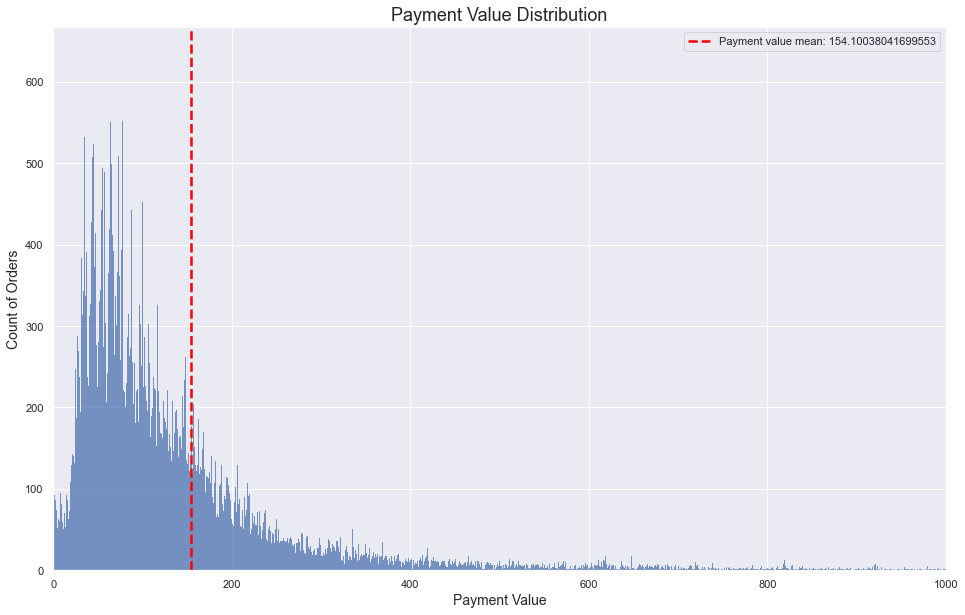

In [88]:
# 'payment_value' distribution
fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(x = 'payment_value',
             data = payments_df,
             binwidth = 0.5)
ax.set_xlabel('Payment Value', fontsize = 14)
ax.set_ylabel('Count of Orders', fontsize = 14)
ax.set_title('Payment Value Distribution', fontsize = 18)
ax.set_xlim(left = 0, right = 1000)
plt.axvline(x = payments_df.payment_value.mean(),
            color = 'red', 
            ls = '--', 
            lw = 2.5)
ax.legend([f'Payment value mean: {payments_df.payment_value.mean()}'])
plt.savefig('Visuals/payment_value_dist.png', bbox_inches='tight', dpi=600);

Mean payment value is 154 reals. 

### order_reviews_dataset

For this dataset we have the following comments from above: \
olist_order_reviews_dataset:

- review_id and order_id contain both numbers and letters
- no missing review scores
- out of 99,224 review scores there are only 11,568 review comment titles
- out of 99,224 review scores there are 40,977 review comment messages

In [21]:
# Let's take a closer look at olist_order_reviews_dataset

reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
print('Number of review IDs:', reviews_df.review_id.nunique())
print('Number of order IDs:', reviews_df.order_id.nunique())

Number of review IDs: 98410
Number of order IDs: 98673


In [23]:
# looking at duplicates based on 'review_id'
print(reviews_df.review_id.duplicated().sum())

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# looking at the duplicated review_ids
review_id_duplicated = reviews_df.loc[reviews_df.review_id.duplicated(keep = False)== True]
review_id_duplicated.sort_values('review_id').reset_index(drop=True)


814


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecido pela impressora, consequentemente não funcionou. Além de ter chegado com atraso de mais de 15 dias do previsto. Preciso que seja trocado.",2018-03-07 00:00:00,2018-03-20 18:08:23
1,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecido pela impressora, consequentemente não funcionou. Além de ter chegado com atraso de mais de 15 dias do previsto. Preciso que seja trocado.",2018-03-07 00:00:00,2018-03-20 18:08:23
2,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
3,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
4,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornecedor sem os parafusos de fixação das partes.,2018-03-07 00:00:00,2018-03-08 03:00:53
...,...,...,...,...,...,...,...
1598,fe5c833752953fed3209646f1f63b53c,4863e15fa53273cc7219c58f5ffda4fb,1,NaN,"Comprei dois produtos e ambos, mesmo enviados em dias diferentes, estão como em ""dificuldade na entrega"" segundo o rastreamento dos Correios. O que nunca me aconteceu antes.",2018-02-28 00:00:00,2018-02-28 13:57:52
1599,ff2fc9e68f8aabfbe18d710b83aabd30,2da58e0a7dcfa4ce1e00fad9d03ca3b5,2,NaN,NaN,2018-03-17 00:00:00,2018-03-19 11:44:15
1600,ff2fc9e68f8aabfbe18d710b83aabd30,1078d496cc6ab9a8e6f2be77abf5091b,2,NaN,NaN,2018-03-17 00:00:00,2018-03-19 11:44:15
1601,ffb8cff872a625632ac983eb1f88843c,c44883fc2529b4aa03ca90e7e09d95b6,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07


***
Total duplicated reviews are 814. It appears that same review has been given to 2+ order_ids indicating that an order might have contained multiple items and both items got rated under one order. 
***

In [24]:
# looking at duplicates based on 'review_id'
print(reviews_df.order_id.duplicated().sum())


# looking at the duplicated review_ids
order_id_duplicated = reviews_df.loc[reviews_df.order_id.duplicated(keep = False)== True]
order_id_duplicated.sort_values('order_id').reset_index(drop=True)


551


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
1,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,"Estou acostumada a comprar produtos pelo baratheon. Super confiável, transparência, qualidade e agilidade. Super recomendo.",2017-08-25 00:00:00,2017-08-29 21:45:57
2,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
3,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
4,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
...,...,...,...,...,...,...,...
1093,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,NaN,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48
1094,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55
1095,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anuncio.",2017-08-22 00:00:00,2017-08-25 11:40:22
1096,870d856a4873d3a67252b0c51d79b950,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-20 18:50:16


There are 551 duplicated order ids. After reviewing the duplicated order reviews, it seems as the review has been revised or accidentally clicked on twice. 

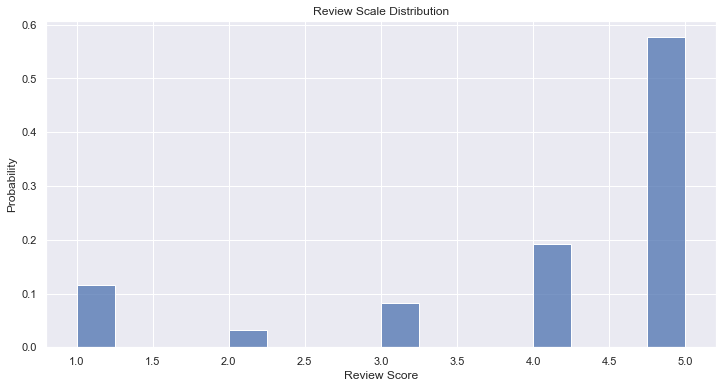

In [51]:
# looking at the review scale distribution

fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x = 'review_score',
             data = reviews_df,
             stat = 'probability', 
             binwidth = 0.25)
ax.set(title = 'Review Scale Distribution')
ax.set(xlabel = 'Review Score') 
plt.savefig('Visuals/Review_scale_distribution.png', bbox_inches='tight', dpi=600);

***
Close to 60% of clients that left a rating gave a 5 star review. 
***

### orders_dataset

Previous notes:

olist_orders_dataset:

- all timestamp data is in object format, not datetime.
- column 'order_approved_at' is missing 160 entries.
- column 'order_delivered_carrier_date' is missing 1,783 entries.
- column 'order_delivered_customer_date' is missing 2,965 entries.

Column description: 
- 'order_approved_at' shows the payment approval timestamp.
- 'order_delivered_carrier_date' shows the order posting timestamp. When it was handled to the logistic partner.
- 'order_delivered_customer_date' shows the actual delivery date to a customer. 

We will start by converting the timestamp data to datetime format. 
Then fill in NANs with means calculated as a difference between order placed and delivered. 

In [229]:
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [230]:
# convert timestamp into datetime

columns_to_datetime = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', \
           'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in orders_df[columns_to_datetime]: 
    orders_df[col] = pd.to_datetime(orders_df[col])


In [231]:
# ensure that the columns has been converted to datetime
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [232]:
# 1st order date
orders_df.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [233]:
# last order date
orders_df.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

The purchase data is for 2 years and 1.5 month. 

In [234]:
# let's visually inspect dataframe when order status is canceled. 
orders_df.loc[orders_df.order_status == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [235]:
# let's visually inspect dataframe when delivery is NaN
orders_df.loc[orders_df.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [236]:
# let's visually inspect dataframe when 'order_approved_at' is missing
orders_df.loc[orders_df.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Order status is a heavy contributor to missing values. When order status is 'canceled', 'shipped', 'unavailable', 
'processing' there are missing values in timestamp columns. 

In [237]:
# we have to drop na to find an average between order and delivery dates so we can fill NaN. 
orders_no_na = orders_df.dropna()
orders_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [238]:
# average time for an order to be handed to a carrier
carrier_date_mean = (orders_no_na.order_delivered_carrier_date - orders_no_na.order_purchase_timestamp).mean().round('1s')
carrier_date_mean

Timedelta('3 days 05:27:38')

In [239]:
# average between carrier and customer delivery time
customer_date_mean = (orders_no_na.order_delivered_customer_date - orders_no_na.order_delivered_carrier_date).\
mean().round('1s')
customer_date_mean

Timedelta('9 days 07:56:09')

In [240]:
# average payment approval time
payment_app_mean = (orders_no_na.order_approved_at - orders_no_na.order_purchase_timestamp).mean().round('1s')
payment_app_mean

Timedelta('0 days 10:16:40')

In [241]:
# create a new df based on orders_df
orders_clean_df = orders_df.copy()

In [242]:
# fill na for 'order_approved_at' column
orders_clean_df.order_approved_at.fillna(orders_df.order_purchase_timestamp + payment_app_mean, inplace = True)
orders_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [243]:
# checking if nan has been filled in correctly.
orders_clean_df.loc[1130]

order_id                         00b1cb0320190ca0daa2c88b35206009
customer_id                      3532ba38a3fd242259a514ac2b6ae6b6
order_status                                             canceled
order_purchase_timestamp                      2018-08-28 15:26:39
order_approved_at                             2018-08-29 01:43:19
order_delivered_carrier_date                                  NaT
order_delivered_customer_date                                 NaT
order_estimated_delivery_date                 2018-09-12 00:00:00
Name: 1130, dtype: object

In [244]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [245]:
# fill NA of 'order_delivered_carrier_date'
orders_clean_df.order_delivered_carrier_date.fillna(orders_df.order_purchase_timestamp + carrier_date_mean, inplace = True)
orders_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [246]:
# fill NA of 'order_delivered_customer_date'
orders_clean_df.order_delivered_customer_date.fillna(orders_clean_df.order_delivered_carrier_date + customer_date_mean, inplace = True)
orders_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [247]:
# Creating 'DayOfWeek' column for purchase data
orders_clean_df['DayOfWeek_purchase'] = orders_clean_df.order_purchase_timestamp.dt.day_name()
orders_clean_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,DayOfWeek_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thursday
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tuesday
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sunday
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Monday


In [248]:
# Creating 'DayOfWeek' column for delevery date
orders_clean_df['DayOfWeek_delivered_customer'] = orders_clean_df['order_delivered_customer_date'].dt.day_name()
orders_clean_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,DayOfWeek_purchase,DayOfWeek_delivered_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,Tuesday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,Friday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,Friday


In [283]:
# 'order_status' distribution

orders_clean_df.order_status.value_counts(normalize = True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

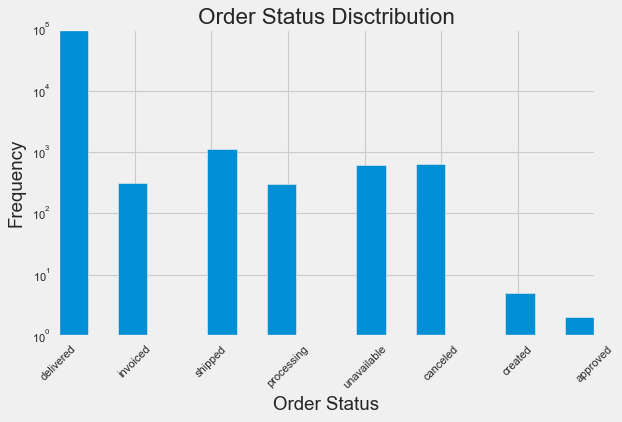

In [264]:
# Let's look at the 'order_status' distribution

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.hist(orders_clean_df['order_status'], bins = 'auto', log = True)
ax.set_title('Order Status Distribution')
ax.set_xlabel('Order Status')
ax.set_ylabel('Frequency')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show;

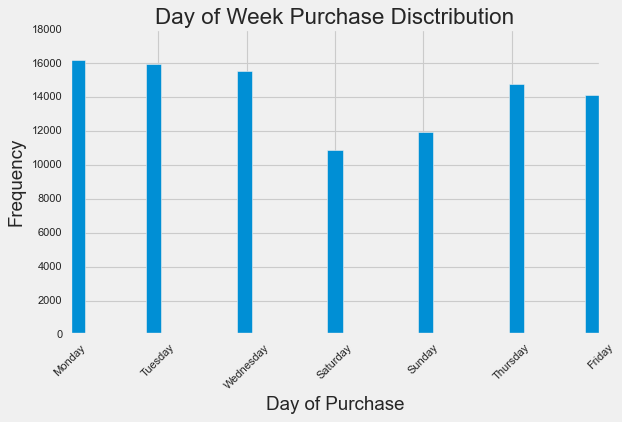

In [270]:
# Let's look at the 'DayOfWeek_purchase' distribution

fig, ax = plt.subplots()
ax.hist(orders_clean_df['DayOfWeek_purchase'], bins = 'auto')
ax.set_title('Day of Week Purchase Distribution')
ax.set_xlabel('Day of Purchase')
ax.set_ylabel('Frequency')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show;

Begining of the week tends to be moree active with order placements. 

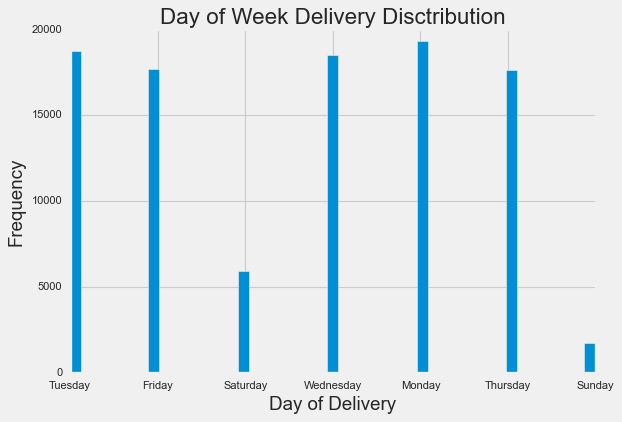

In [269]:
# Let's look at the 'DayOfWeek_purchase' distribution

fig, ax = plt.subplots()
ax.hist(orders_clean_df['DayOfWeek_delivered_customer'], bins = 'auto')
ax.set_title('Day of Week Delivery Distribution')
ax.set_xlabel('Day of Delivery')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show;

Deliveries on weekdays are significantly higher than on weekends as expected. 

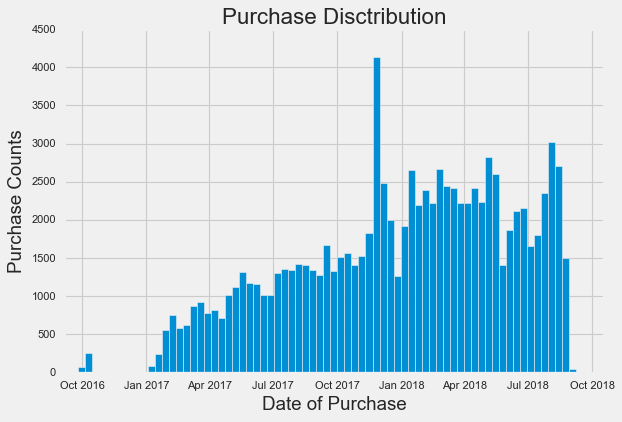

In [273]:
# historical purchase distribution

fig, ax = plt.subplots()
ax.hist(orders_clean_df['order_purchase_timestamp'], bins = 'auto')
ax.set_title('Purchase Distribution')
ax.set_xlabel('Date of Purchase')
ax.set_ylabel('Purchase Counts')

plt.tight_layout()
plt.show;

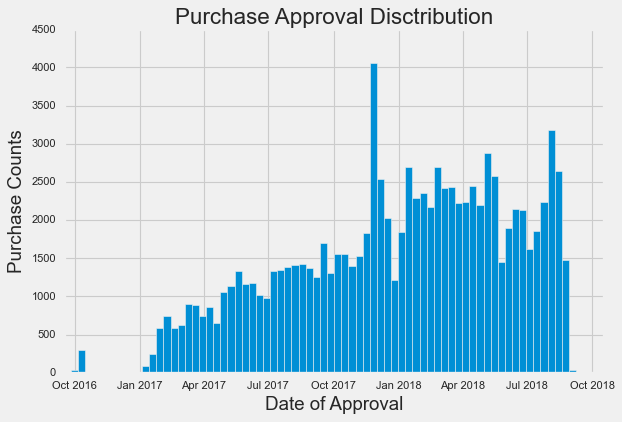

In [278]:
# Looking at the timestamp data frequency

#timestamp = ['order_purchase_timestamp']
   #          'order_approved_at', 'order_delivered_carrier_date',
          #   'order_delivered_customer_date', 'order_estimated_delivery_date']

# historical purchase approval distribution

fig, ax = plt.subplots()
ax.hist(orders_clean_df['order_approved_at'], bins = 'auto')
ax.set_title('Purchase Approval Distribution')
ax.set_xlabel('Date of Approval')
ax.set_ylabel('Purchase Counts')

plt.tight_layout()
plt.show;

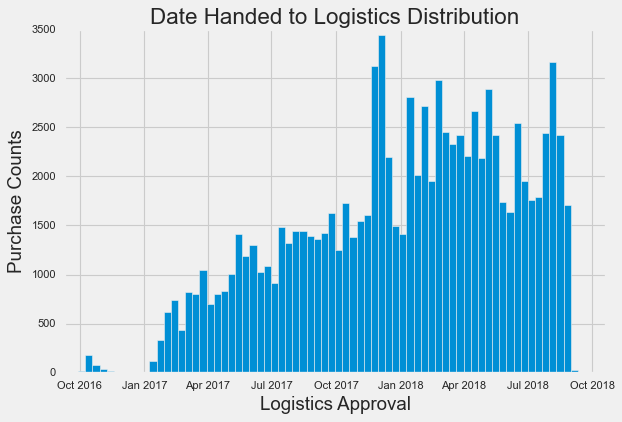

In [279]:
# date handed to logistical partner distribution

fig, ax = plt.subplots()
ax.hist(orders_clean_df['order_delivered_carrier_date'], bins = 'auto')
ax.set_title('Date Handed to Logistics Distribution')
ax.set_xlabel('Logistics Approval')
ax.set_ylabel('Purchase Counts')

plt.tight_layout()
plt.show;

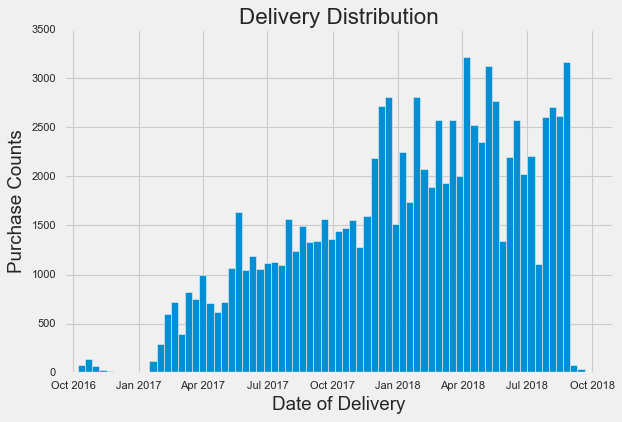

In [280]:
# delivery dist

fig, ax = plt.subplots()
ax.hist(orders_clean_df['order_delivered_customer_date'], bins = 'auto')
ax.set_title('Delivery Distribution')
ax.set_xlabel('Date of Delivery')
ax.set_ylabel('Purchase Counts')

plt.tight_layout()
plt.show;

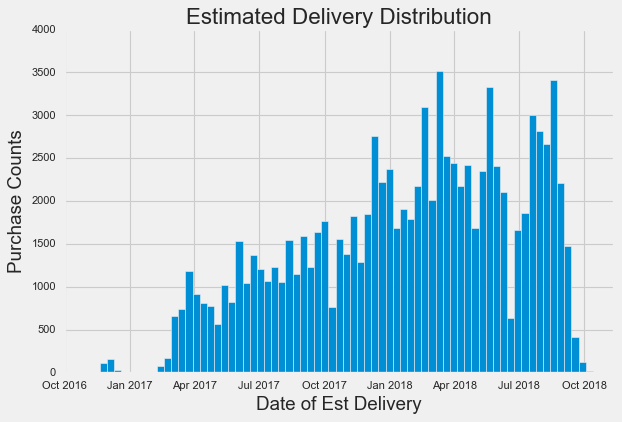

In [281]:
# est delivery dist

fig, ax = plt.subplots()
ax.hist(orders_clean_df['order_estimated_delivery_date'], bins = 'auto')
ax.set_title('Estimated Delivery Distribution')
ax.set_xlabel('Date of Est Delivery')
ax.set_ylabel('Purchase Counts')

plt.tight_layout()
plt.show;

Overall the timestamp data follows similar pattern. There is a spike in orders at the end of 2017 and delivery slowdowns at the begining of summer 2018. 

##### Insights: 
- Number of orders has been progressively increasing over time. 
- Begining of the week tends to be moree active with order placements.
- Deliveries on weekdays are significantly higher than on weekends as expected.
- On average it takes about 10hrs and 16 min to get a placed order approved. 
- On average it takes 3 days and 5.5hrs for an order handling. 
- Order delivery is about 12.5 days from the time an order is placed. 

### products_dataset

- 'product_category_name' is in Portuguese.
- columns: 'product_category_name', 'product_name_lenght', 'product_description_lenght', and 'product_photos_qty' are missing 610 entries.
- columns: 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' are missing two entries.


In [308]:
# creating df

products_df= pd.read_csv('data/olist_products_dataset.csv')
print(products.shape)
products_df.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [300]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [307]:
# confirming that missing values are in the same 610 rows

products_df.loc[(products_df.product_category_name.isna()) & (products_df.product_name_lenght.isna()) & 
                (products_df.product_description_lenght.isna()) & (products_df.product_photos_qty.isna())]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [310]:
products_df.loc[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


About 2% of value are missing for product category name. We will create a new clean df and delete rows with missing values. 

In [311]:
# dropping Nan
products_clean_df = products_df.dropna()

In [312]:
# number of category names

products_clean_df.product_category_name.nunique()

73

In [320]:
# getting the counts of category
from collections import Counter

categories = Counter(products_clean_df.product_category_name)

category = []
popularity = []

for item in categories.most_common(15): 
    category.append(item[0])
    popularity.append(item[1])

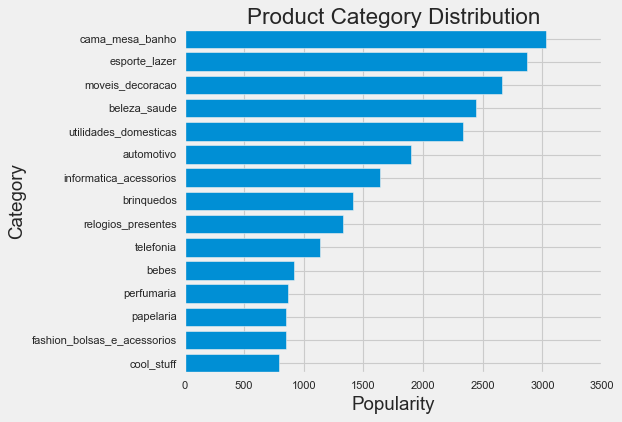

In [325]:
# product category dist

category.reverse()
popularity.reverse()

fig, ax = plt.subplots()
ax.barh(category, popularity)

ax.set_title('Product Category Distribution')
ax.set_xlabel('Popularity')
ax.set_ylabel('Category')

plt.tight_layout()
plt.show;

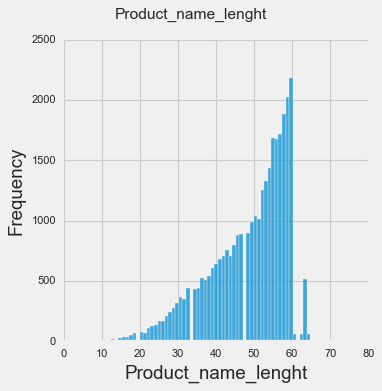

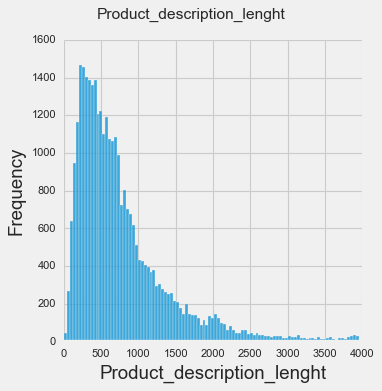

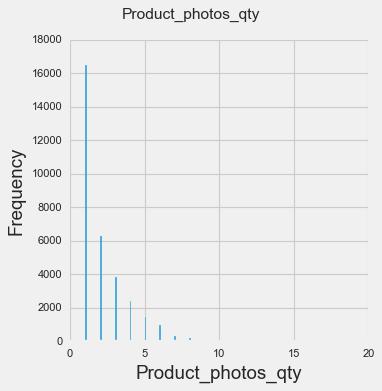

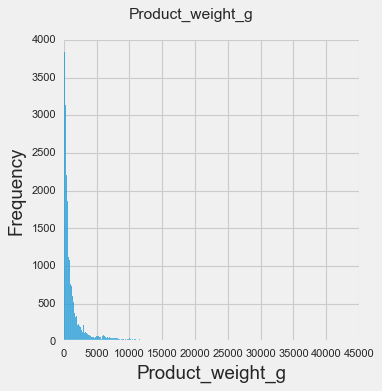

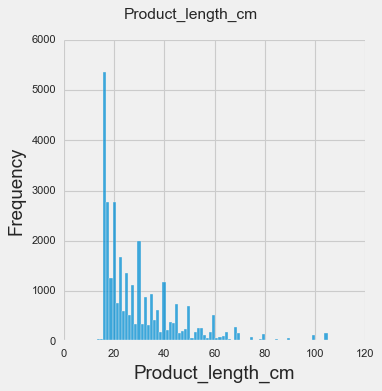

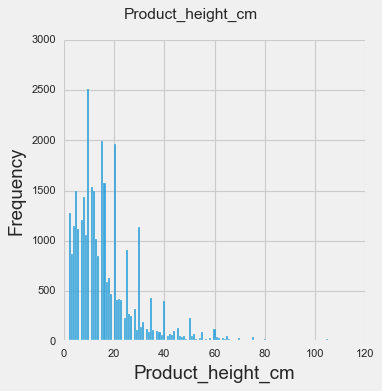

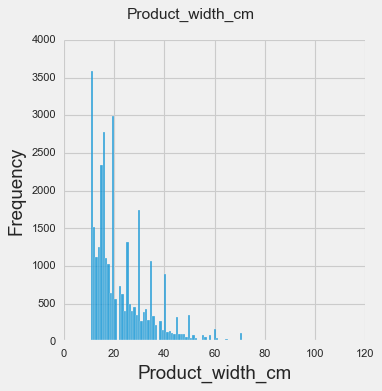

In [331]:
# Looking at histograms of numeric columns

num_columns = products_clean_df.select_dtypes('number')

for col in num_columns: 
    g = sns.displot(
    products_clean_df, x=col, 
    kind='hist'
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col.capitalize()}', 'Frequency')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'{col.capitalize()}')
    

### sellers_dataset

no information is missing.


In [334]:
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
print(sellers_df.shape)
print(sellers_df.info())
sellers_df.head()


(3095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


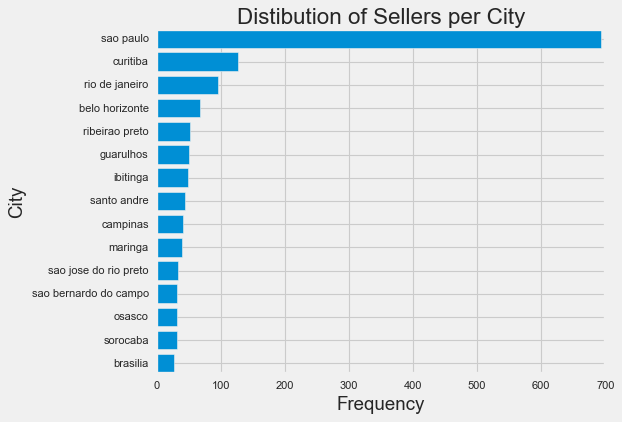

In [336]:
# distibution of sellers per city
seller_city = Counter(sellers_df.seller_city)

city = []
frequency = []

for item in seller_city.most_common(15): 
    city.append(item[0])
    frequency.append(item[1])

# product category dist

city.reverse()
frequency.reverse()

fig, ax = plt.subplots()
ax.barh(city, frequency)

ax.set_title('Distibution of Sellers per City')
ax.set_xlabel('Frequency')
ax.set_ylabel('City')

plt.tight_layout()
plt.show;


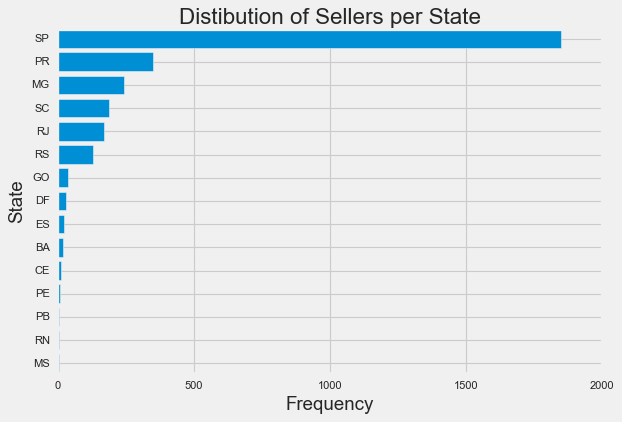

In [337]:
# distibution of sellers per state
seller_state = Counter(sellers_df.seller_state)

state = []
frequency = []

for item in seller_state.most_common(15): 
    state.append(item[0])
    frequency.append(item[1])

# product category dist

state.reverse()
frequency.reverse()

fig, ax = plt.subplots()
ax.barh(state, frequency)

ax.set_title('Distibution of Sellers per State')
ax.set_xlabel('Frequency')
ax.set_ylabel('State')

plt.tight_layout()
plt.show;


##### Insights: 

- There are 3095 sellers
- Every forth seller is based in Sao Paolo, 
- States with most sellers: Sao Paolo, Parana, Minas Gerais. 

### product_category_name_translation:

no information is missing

In [341]:
name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
print(name_translation_df.shape)
name_translation_df.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
